# AlexNet with Keras

## Step 1: Import libraries and create an environment

1. Open Terminal
2. `conda create -n TF python=3.5 tensorflow pandas numpy jupyter ipython`
3. `. activate py35`
4. `conda install -c derickl tflearn`
5. `cd` to directory of choice
6. `jupyter notebook`

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
np.random.seed(1000)

## Step 2: Import data

In [2]:
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!


## Step 3: Create a sequential model, Compile, and Train

**Add 5 Convolutional layers:** 
Batch normalize all convolutional layers

**Layer 1:**
*Hint: x.shape should help you understand inputs for Convolutional layer*

Convolutional layer with 96 filters, 11 by 11 kernel, strides of 4, valid padding, relu activation

Max Pooling layer with 2 by 2 pool size, valid padding

**Layer 2:**
Convolutional layer with 256 filters, 11 by 11 kernel, strides of 1, valid padding, relu activation

**Layer 3:**
Convolutional layer with 384 filters, 3 by 3 kernel, strides of 1, valid padding, relu activation

**Layer 4:**
Convolutional layer with 384 filters, 3 by 3 kernel, stride of 1, valid padding, relu activation

**Layer 5:**
Convolutional layer with 256 filters, 3 by 3 kernel, stride of 1, valid padding, relu activation

Max Pooling layer with 2 by 2 pool size, valid padding

**Add 3 Fully Connected Layers:**
Flatten data to pass to dense layers

*Note: Add Dropout of 0.5 

**Layer 1:**
Dense layer 4096, relu activation 
*Note: 4096 is an AlexNet parameter*

**Layer 2:**
Dense Layer 4096, relu activation

**Layer 3:**
Dense Layer 1000, relu activation

**Output Layer**
Dense layer with 17 outputs to match the number of classes, softmax activation

**Model Summary**
Use model.summary to get output shapes and number of parameters

**Compile**
Compile the model with categorical cross entropy loss, adam optimizer, accuracy metrics

**Train the model**
Train the model with batch size of 64, 1 epoch to start (you can change this later), and verbose=1
Hold back 20% of data for dev set and don't forget to shuffle

*Hints:*

*Hint 1: model.add(Conv2D(...))*

*Hint 2: model.add(BatchNormalization())*

*Hint 3: model.add(Dropout())*

*Hint 4: model.compile()*

*Hint 5: model.fit*

*Hint 5: metrics = ["accuracy"]*



In [3]:
x.shape

(1360, 224, 224, 3)

In [4]:
y.shape

(1360, 17)

In [5]:
model = keras.Sequential()

### Convolutional Layers

#### Layer 1 - Convolution and Max Pooling

In [6]:
model.add(tf.keras.layers.Conv2D(
    input_shape = (224,224,3),
    data_format="channels_last",
    filters=96, 
    kernel_size=(11,11), 
    strides = (4,4), 
    padding="valid", 
    activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2), 
    padding="valid"))

#### Layer 2 - Convolution 

In [7]:
#Layer 2 - Convolution 
model.add(tf.keras.layers.Conv2D(
    filters=256, 
    kernel_size=(5,5), 
    #strides = (4,4), Unclear what the strides are in the paper.
    padding="valid", 
    activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2), 
    padding="valid"))

#### Layer 3 - Convolution 

In [8]:
#Layer 3 - Convolution 
model.add(tf.keras.layers.Conv2D(
    filters=384, 
    kernel_size=(3,3), 
    #strides = (4,4), Unclear what the strides are in the paper.
    padding="valid", 
    activation="relu"))

#### Layer 4 - Convolution 

In [9]:
#Layer 4 - Convolution 
model.add(tf.keras.layers.Conv2D(
    filters=384, 
    kernel_size=(3,3), 
    #strides = (4,4), Unclear what the strides are in the paper.
    padding="valid", 
    activation="relu"))

#### Layer 5 - Convolution 

In [10]:
#Layer 5 - Convolution 
model.add(tf.keras.layers.Conv2D(
    filters=256, 
    kernel_size=(3,3), 
    #strides = (4,4), Unclear what the strides are in the paper.
    padding="valid", 
    activation="relu"))

#### Flatten Output and Pass to Fully Connected Layers

In [11]:
model.add(tf.keras.layers.Flatten())

### Fully Connected Layers

#### Layer 1 - Dense 4096

In [12]:
model.add(tf.keras.layers.Dense(4096, input_shape=(224*224*3,)))

In [13]:
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.5))

#### Layer 2 - Dense 4096

In [14]:
model.add(tf.keras.layers.Dense(4096))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.5))

#### Layer 3 - Dense 1000

In [15]:
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.5))

### Output Layer for 17 class softmax

In [16]:
model.add(tf.keras.layers.Dense(17))
model.add(tf.keras.layers.Activation("softmax"))

#### Model Summary

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 256)         884992    
__________

### Compile

In [18]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Train

In [20]:
history1 = model.fit(x, y, batch_size=128, epochs=10, verbose=1, validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - 92s 84ms/step - loss: 2.8315 - acc: 0.0579 - val_loss: 2.7968 - val_acc: 0.0404
Epoch 2/10
1088/1088 [==============================] - 85s 78ms/step - loss: 2.8169 - acc: 0.0533 - val_loss: 2.8336 - val_acc: 0.0662
Epoch 3/10
1088/1088 [==============================] - 81s 74ms/step - loss: 2.8080 - acc: 0.0616 - val_loss: 2.7611 - val_acc: 0.0809
Epoch 4/10
1088/1088 [==============================] - 83s 76ms/step - loss: 2.7825 - acc: 0.0846 - val_loss: 2.8341 - val_acc: 0.0368
Epoch 5/10
1088/1088 [==============================] - 75s 69ms/step - loss: 2.8330 - acc: 0.0653 - val_loss: 2.8368 - val_acc: 0.0368
Epoch 6/10
1088/1088 [==============================] - 69s 64ms/step - loss: 2.8334 - acc: 0.0634 - val_loss: 2.8374 - val_acc: 0.0368
Epoch 7/10
1088/1088 [==============================] - 73s 67ms/step - loss: 2.8324 - acc: 0.0662 - val_loss: 2.8386 - val_acc: 0.0368
E

### Visualizing how our model did... 

`model.fit()` returns a `History` object that contains a dictionary with everything that happened during training:

In [21]:
history_dict = history1.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [24]:
#will need to conda install matplotlib
import matplotlib.pyplot as plt 

%matplotlib inline

### Visualize Loss

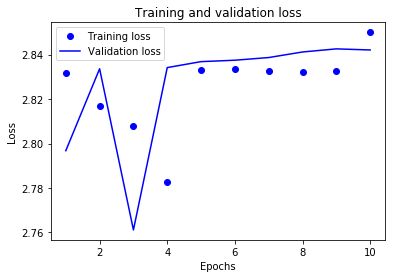

In [25]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Visualize Accuracy 

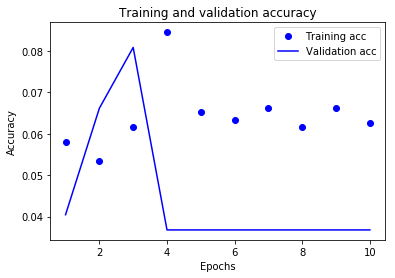

In [26]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()

plt.show()